In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import Numerov
import utils
import Hartree_XC
import numpy as np
import Atomic_Like_Potential as ALP
from Atomic_Like_Potential import K_sqrt_exp_grid_radi_schr as K_sqrt
#from Atomic_Like_Potential import K2_atomic_radial as K_sqrt
from Radial_Eigenfunction import Radial_Eigenfunction

In [3]:
r_max=15.0
grid_points=500
delta=0.0
rp= utils.get_rp(r_max, grid_points, delta)
print(rp)

inf


/home/arturo_hernandez/Desktop/physics_coding_projects/numerical_orbitals/utils.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(np.exp(delta*grid_points) - 1.0)


In [4]:
kwargs={'E':-0.5, 'Z':1.0, 'l':0, 
        'rp':rp, 'delta':delta,
         'r_max':r_max, 'delta_x': 0.01, 'r_N':15.0,}



In [5]:
r_exp_grid= np.array(utils.get_exponential_grid(delta=kwargs['delta'], 
                                                rp=kwargs['rp'], 
                                                grid_points=grid_points))

/home/arturo_hernandez/Desktop/physics_coding_projects/numerical_orbitals/utils.py:18: RuntimeWarning: invalid value encountered in multiply
  return list(rp*(np.exp(delta*np.array([*range(grid_points)])) - 1.0))


In [6]:
r_exp_grid= np.flip(np.array(utils.get_uniform_r_grid(**kwargs)))

In [7]:
VH= len(r_exp_grid)*[0.0]

In [8]:
#plt.plot([*range(len(delta_x))], delta_x)

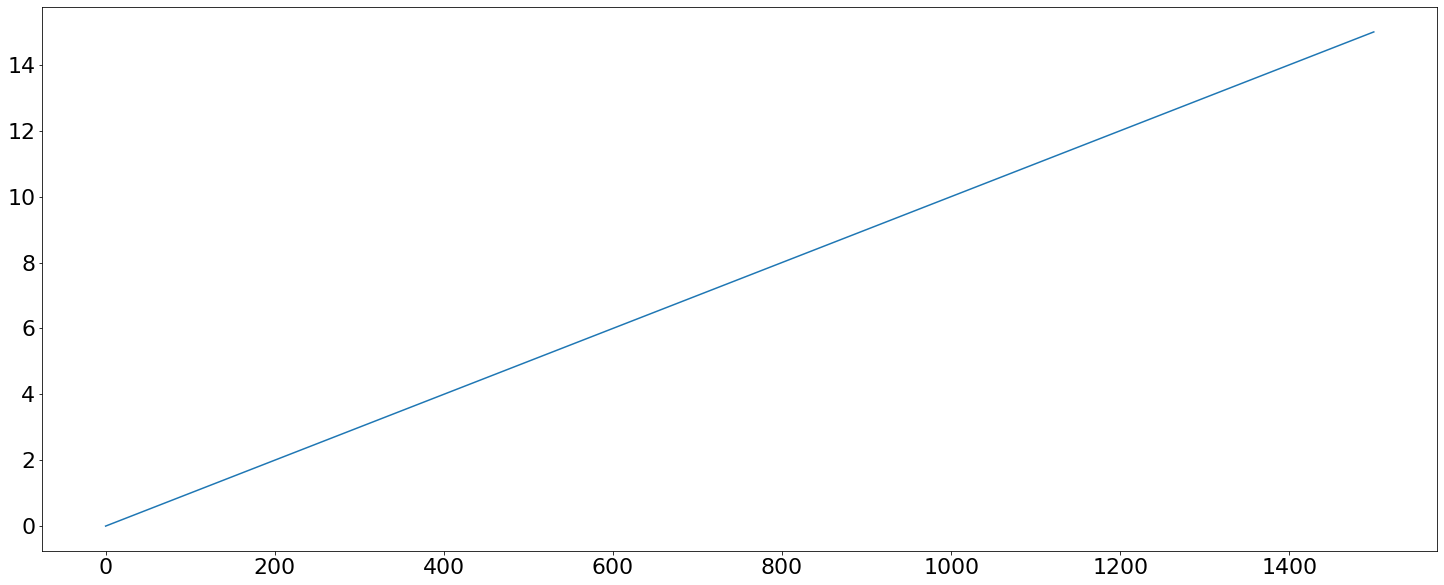

In [9]:
plt.plot([*range(len(r_exp_grid))], r_exp_grid)

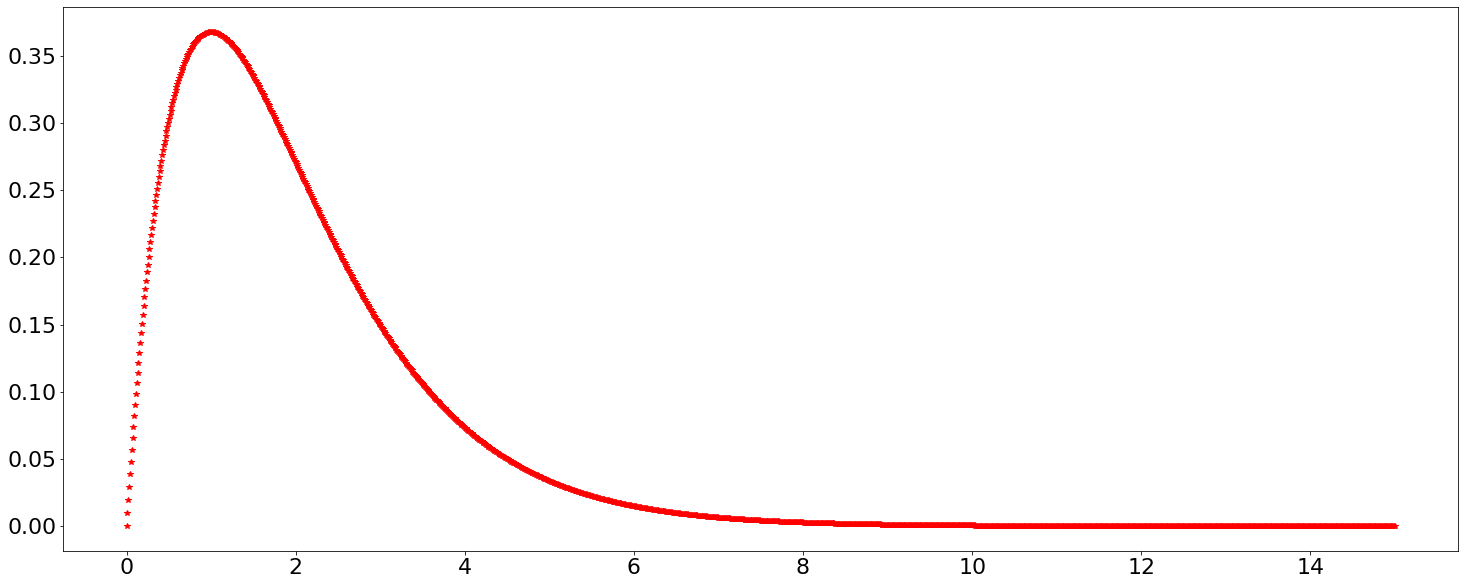

In [10]:
u_hydr= utils.U_Hydrogen(r_exp_grid)
u_func=[u_hydr[-1], u_hydr[-2]]
plt.plot(r_exp_grid, u_hydr, '*r')

In [11]:
u_func

[4.588534807527386e-06, 4.6315605821152145e-06]

In [12]:
def G(delta_x,K_sqrt, gamma=1.0):
    temp= (1.0 + (gamma*(delta_x**2.0)*K_sqrt)/12.0)
    return temp

In [13]:
delta_x= r_exp_grid[1:] - r_exp_grid[:-1]
u_func_temp=len(r_exp_grid)*[1.0]
u_func_temp[-1]= u_func[0]
u_func_temp[-2]= u_func[1]
delta=  kwargs['delta']
print(len(u_func_temp))
for j in reversed(range(1, len(r_exp_grid)-2)):
    m=j
    m1=j+1
    m2=j+2
    K_sqrt_m= K_sqrt(r_exp_grid[m],VH[m],m,kwargs)
    K_sqrt_m1= K_sqrt(r_exp_grid[m1],VH[m1],m1,kwargs)
    K_sqrt_m2= K_sqrt(r_exp_grid[m2],VH[m2],m2,kwargs)

    numerov_nume= (2.0*G(delta_x[m1-1],K_sqrt_m1, gamma=-5.0)*u_func_temp[m1]*np.exp(-1.0*delta*m1*0.5) \
                   - G(delta_x[m2-1],K_sqrt_m2)*u_func_temp[m2]*np.exp(-1.0*delta*m2*0.5))

    numerov_deno= G(delta_x[m-1],K_sqrt_m)

    u_func_temp[m]= (np.exp(delta*m*0.5)*numerov_nume/numerov_deno)

u_func_temp= np.array(u_func_temp)

print(len(u_func_temp))

1501
1501


/home/arturo_hernandez/Desktop/physics_coding_projects/numerical_orbitals/Atomic_Like_Potential.py:25: RuntimeWarning: invalid value encountered in double_scalars
  out= -1.0*(delta**2.0)/4.0 - 2.0*((rp*delta)**0.0)*np.exp(2.0*delta*j)*(V_coulomb(r_n, Z) + V_angular(r_n,l) - E)


In [12]:
delta_x= r_exp_grid[1:] - r_exp_grid[:-1]
u_func_temp=len(r_exp_grid)*[1.0]
u_func_temp[-1]= u_func[0]
u_func_temp[-2]= u_func[1]
delta=  kwargs['delta']
print(len(u_func_temp))
for j in reversed(range(1, len(r_exp_grid)-2)):
    m=j
    m1=j+1
    m2=j+2
    K_sqrt_m= K_sqrt(r_exp_grid[m],VH[m],m,kwargs)
    K_sqrt_m1= K_sqrt(r_exp_grid[m1],VH[m1],m1,kwargs)
    K_sqrt_m2= K_sqrt(r_exp_grid[m2],VH[m2],m2,kwargs)

    numerov_nume= (2.0*G(delta_x[m1-1],K_sqrt_m1, gamma=-5.0)*u_func_temp[m1]*np.exp(-1.0*delta*m1*0.5) \
                   - G(delta_x[m2-1],K_sqrt_m2)*u_func_temp[m2]*np.exp(-1.0*delta*m2*0.5))

    numerov_deno= G(delta_x[m-1],K_sqrt_m)

    u_func_temp[m]= (np.exp(delta*m*0.5)*numerov_nume/numerov_deno)

u_func_temp= np.array(u_func_temp)

print(len(u_func_temp))

500
500


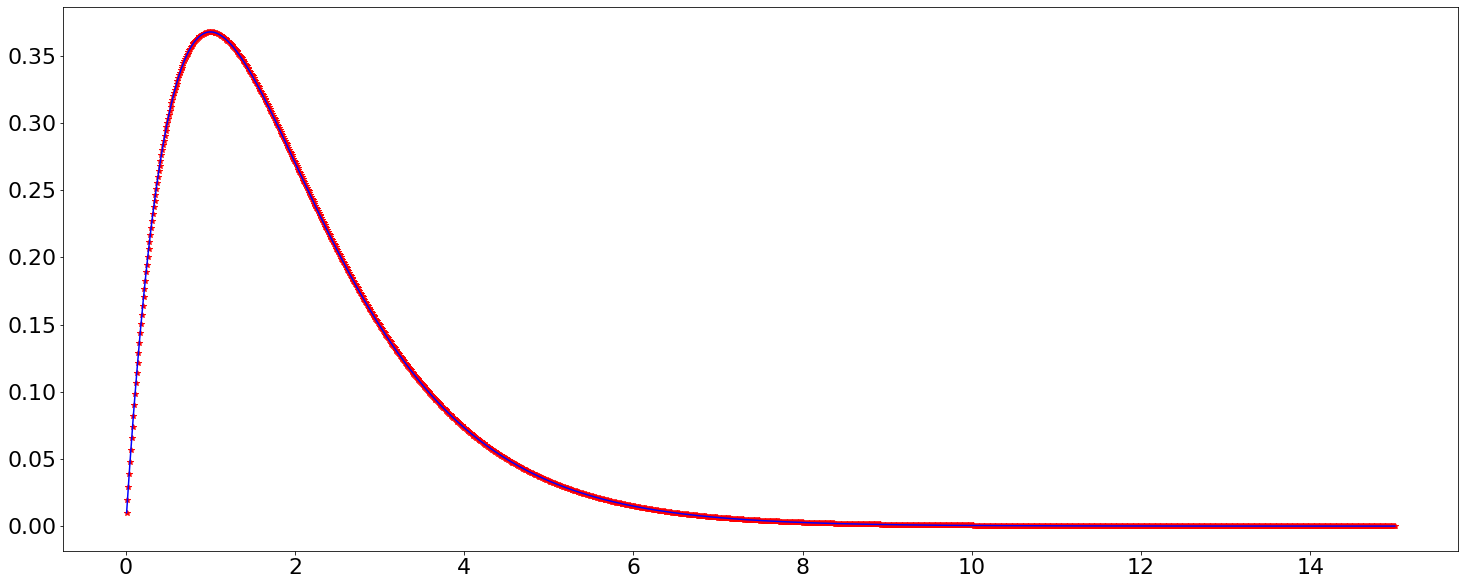

In [15]:
plt.plot(r_exp_grid[1:], u_func_temp[1:], '*r', r_exp_grid[1:], u_hydr[1:], '-b')

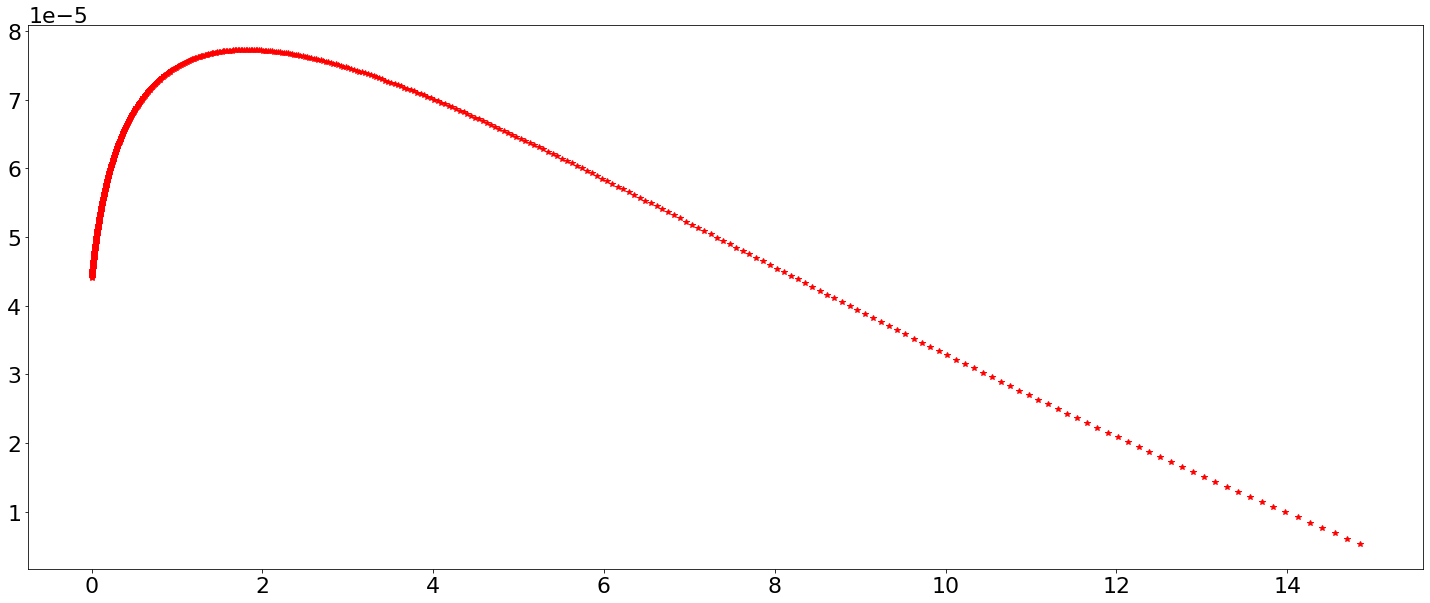

In [13]:
plt.plot(r_exp_grid[1:], u_func_temp[1:], '*r')

In [28]:
len(r_exp_grid)

1000

In [29]:
u_func_temp

array([1.00000000e+00, 7.01628922e-05, 7.01005436e-05, 7.00381862e-05,
       6.99758208e-05, 6.99134480e-05, 6.98510678e-05, 6.97886806e-05,
       6.97262863e-05, 6.96638850e-05, 6.96014769e-05, 6.95390620e-05,
       6.94766402e-05, 6.94142117e-05, 6.93517765e-05, 6.92893345e-05,
       6.92268859e-05, 6.91644306e-05, 6.91019687e-05, 6.90395001e-05,
       6.89770249e-05, 6.89145431e-05, 6.88520547e-05, 6.87895597e-05,
       6.87270581e-05, 6.86645500e-05, 6.86020353e-05, 6.85395140e-05,
       6.84769861e-05, 6.84144517e-05, 6.83519108e-05, 6.82893633e-05,
       6.82268093e-05, 6.81642487e-05, 6.81016816e-05, 6.80391080e-05,
       6.79765279e-05, 6.79139413e-05, 6.78513481e-05, 6.77887484e-05,
       6.77261422e-05, 6.76635295e-05, 6.76009103e-05, 6.75382846e-05,
       6.74756524e-05, 6.74130137e-05, 6.73503684e-05, 6.72877167e-05,
       6.72250585e-05, 6.71623938e-05, 6.70997226e-05, 6.70370449e-05,
       6.69743608e-05, 6.69116701e-05, 6.68489729e-05, 6.67862693e-05,
      

In [30]:
u_func_temp

array([1.00000000e+00, 7.01628922e-05, 7.01005436e-05, 7.00381862e-05,
       6.99758208e-05, 6.99134480e-05, 6.98510678e-05, 6.97886806e-05,
       6.97262863e-05, 6.96638850e-05, 6.96014769e-05, 6.95390620e-05,
       6.94766402e-05, 6.94142117e-05, 6.93517765e-05, 6.92893345e-05,
       6.92268859e-05, 6.91644306e-05, 6.91019687e-05, 6.90395001e-05,
       6.89770249e-05, 6.89145431e-05, 6.88520547e-05, 6.87895597e-05,
       6.87270581e-05, 6.86645500e-05, 6.86020353e-05, 6.85395140e-05,
       6.84769861e-05, 6.84144517e-05, 6.83519108e-05, 6.82893633e-05,
       6.82268093e-05, 6.81642487e-05, 6.81016816e-05, 6.80391080e-05,
       6.79765279e-05, 6.79139413e-05, 6.78513481e-05, 6.77887484e-05,
       6.77261422e-05, 6.76635295e-05, 6.76009103e-05, 6.75382846e-05,
       6.74756524e-05, 6.74130137e-05, 6.73503684e-05, 6.72877167e-05,
       6.72250585e-05, 6.71623938e-05, 6.70997226e-05, 6.70370449e-05,
       6.69743608e-05, 6.69116701e-05, 6.68489729e-05, 6.67862693e-05,
      